In [24]:
import pandas as pd

In [25]:
df4=pd.read_csv('/Users/mariusleorat/Downloads/S8-ExplainabilityAI/DISASTERS/1970-2021_DISASTERS.xlsx - emdat data.csv')

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO                              14644 non-null  object 
 12  Region            

In [27]:
print(df4.isnull().sum())

Dis No                                 0
Year                                   0
Seq                                    0
Glide                              13063
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2747
Disaster Subsubtype                13600
Event Name                         10999
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1346
Origin                             10864
Associated Dis                     11412
Associated Dis2                    13946
OFDA Response                      13194
Appeal                             12204
Declaration                        11517
Aid Contribution                   13967
Dis Mag Value                      10075
Dis Mag Scale                       1073
Latitude        

In [28]:
# Create a composite severity score
df4['severity_score'] = (
    df4['Total Deaths'].fillna(0) + 
    (df4['Total Damages (\'000 US$)'].fillna(0) * 0.001) + 
    df4['Total Affected'].fillna(0)
)

# Create segments (e.g., low, medium, high impact) based on severity_score
df4['impact_segment'] = pd.cut(df4['severity_score'], bins=[0, 50, 200, df4['severity_score'].max()], labels=['Low', 'Medium', 'High'])


In [29]:
df4['impact_segment']

0        Medium
1        Medium
2           Low
3          High
4        Medium
          ...  
14639      High
14640      High
14641      High
14642       Low
14643      High
Name: impact_segment, Length: 14644, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

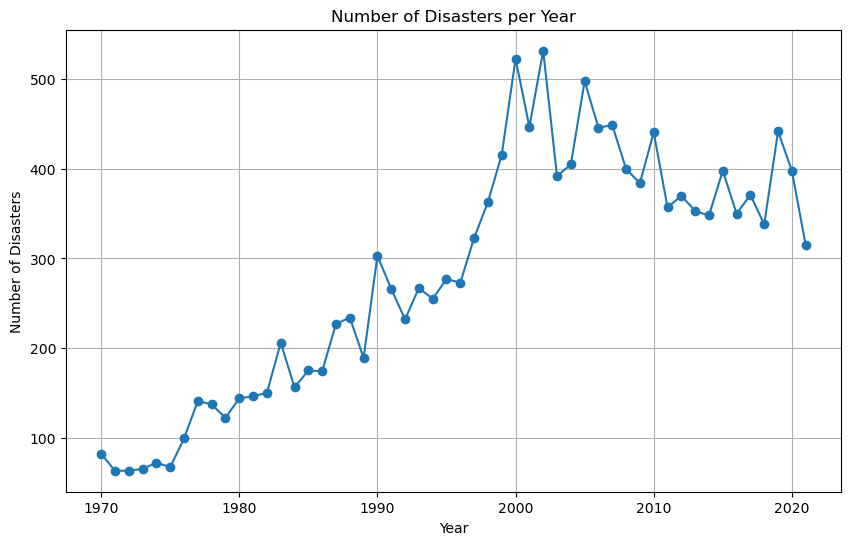

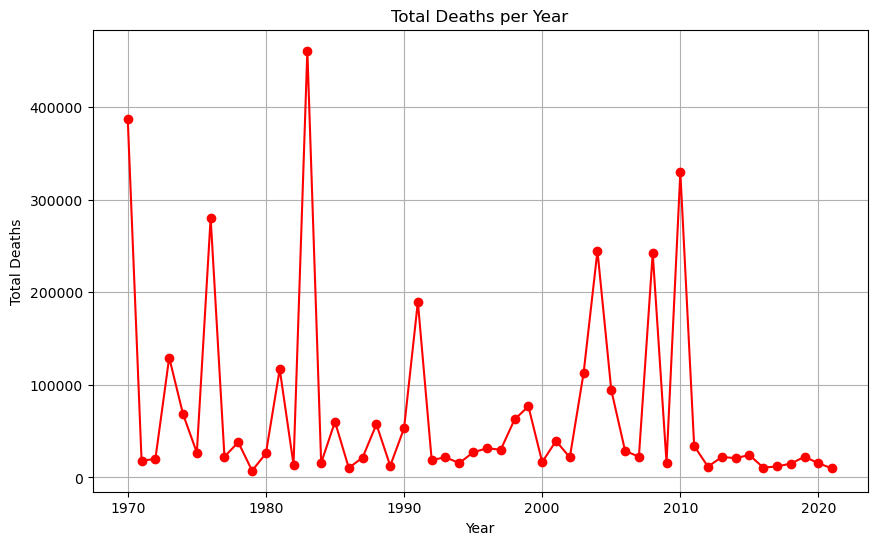

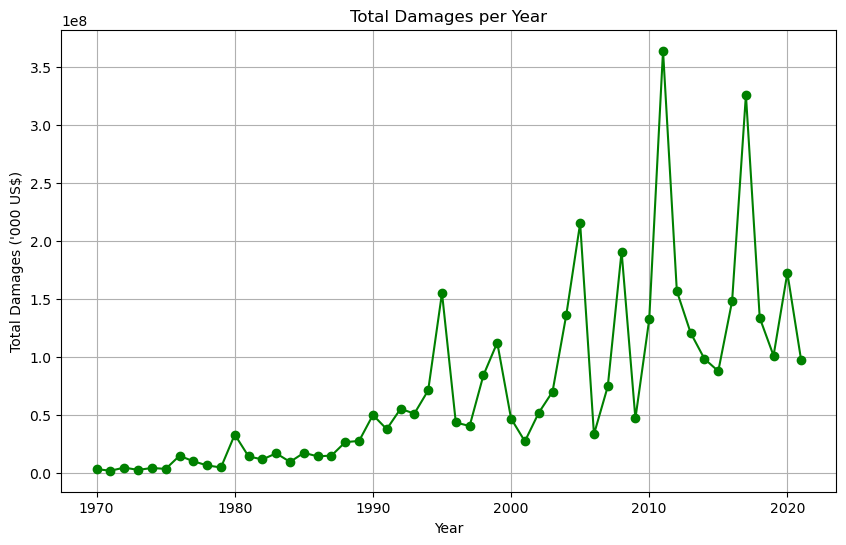

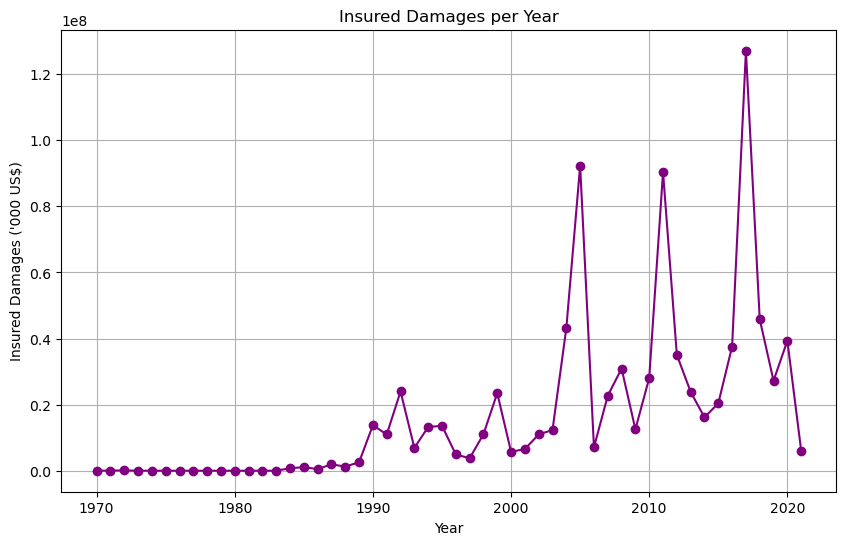

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame already loaded and cleaned
# Group by Year and aggregate key metrics
yearly_stats = df4.groupby("Year").agg(
    num_disasters=("Dis No", "count"),
    total_deaths=("Total Deaths", "sum"),
    total_damages=("Total Damages ('000 US$)", "sum"),
    insured_damages=("Insured Damages ('000 US$)", "sum")
).reset_index()

# Graph 1: Number of Disasters per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["num_disasters"], marker="o")
plt.title("Number of Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid(True)
plt.show()

# Graph 2: Total Deaths per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["total_deaths"], marker="o", color='red')
plt.title("Total Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

# Graph 3: Total Damages per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["total_damages"], marker="o", color='green')
plt.title("Total Damages per Year")
plt.xlabel("Year")
plt.ylabel("Total Damages ('000 US$)")
plt.grid(True)
plt.show()

# Graph 4: Insured Damages per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["insured_damages"], marker="o", color='purple')
plt.title("Insured Damages per Year")
plt.xlabel("Year")
plt.ylabel("Insured Damages ('000 US$)")
plt.grid(True)
plt.show()


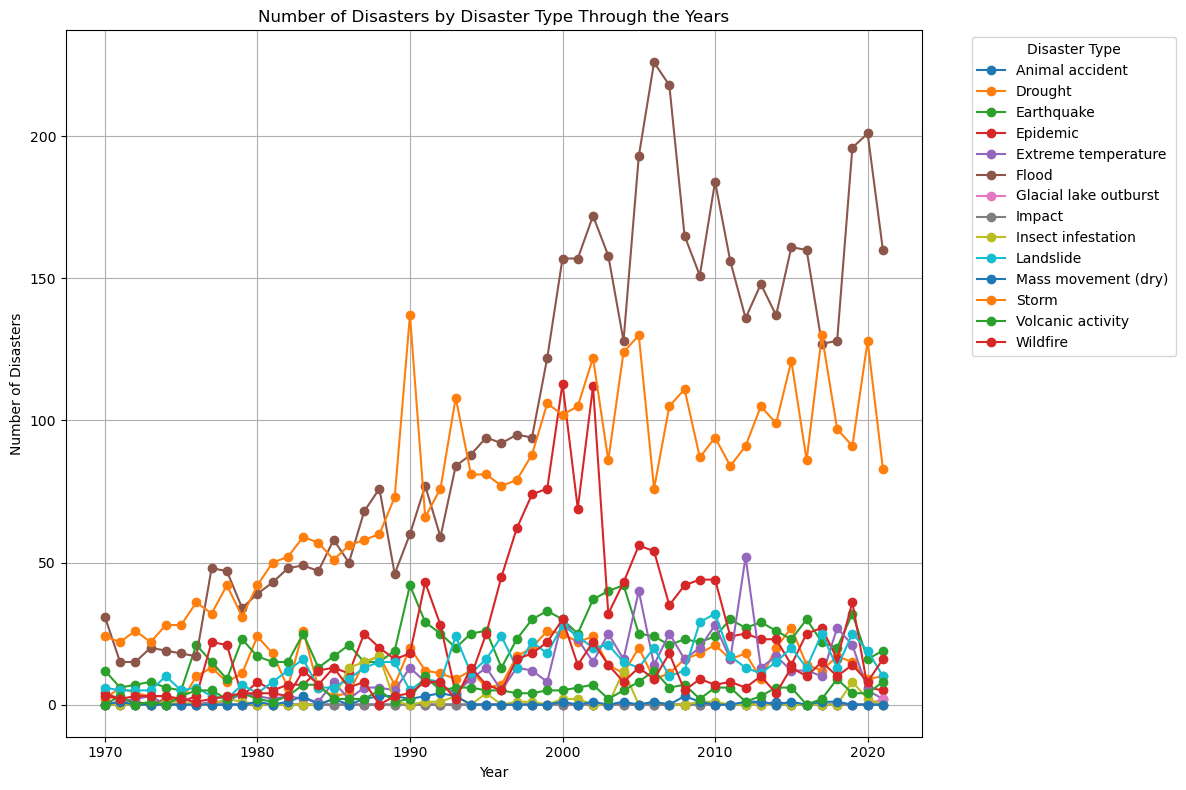

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Year and Disaster Type and count the number of disasters for each combination.
# We're assuming each row represents one disaster event.
year_disaster = df4.groupby(['Year', 'Disaster Type']).size().reset_index(name='count')

# Pivot the table so that each disaster type becomes a column
pivot_df = year_disaster.pivot(index='Year', columns='Disaster Type', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(12,8))
for disaster_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[disaster_type], marker='o', label=disaster_type)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Number of Disasters by Disaster Type Through the Years")
plt.legend(title="Disaster Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


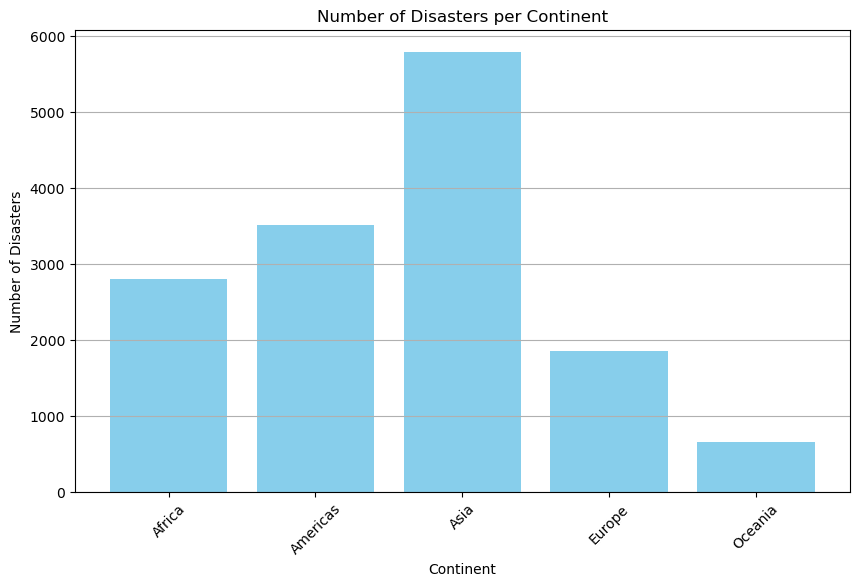

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Continent' and count the number of disasters
disasters_per_continent = df4.groupby('Continent').size().reset_index(name='count')

# Plot a bar chart for the number of disasters per continent
plt.figure(figsize=(10, 6))
plt.bar(disasters_per_continent['Continent'], disasters_per_continent['count'], color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters per Continent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


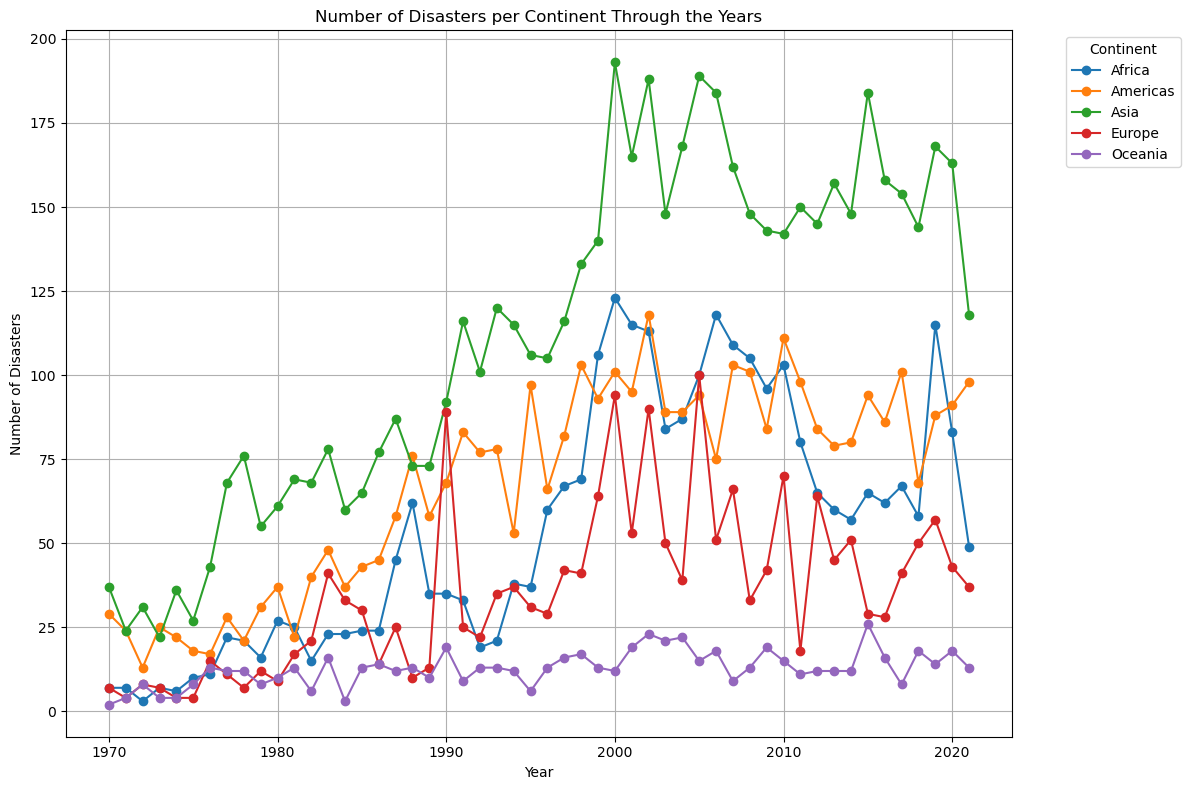

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Year and Continent, and count the number of disasters for each combination.
year_continent = df4.groupby(['Year', 'Continent']).size().reset_index(name='count')

# Pivot the table so that each continent becomes a column with yearly counts.
pivot_df = year_continent.pivot(index='Year', columns='Continent', values='count').fillna(0)

# Create a line chart for each continent
plt.figure(figsize=(12, 8))
for continent in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[continent], marker='o', label=continent)

plt.title("Number of Disasters per Continent Through the Years")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

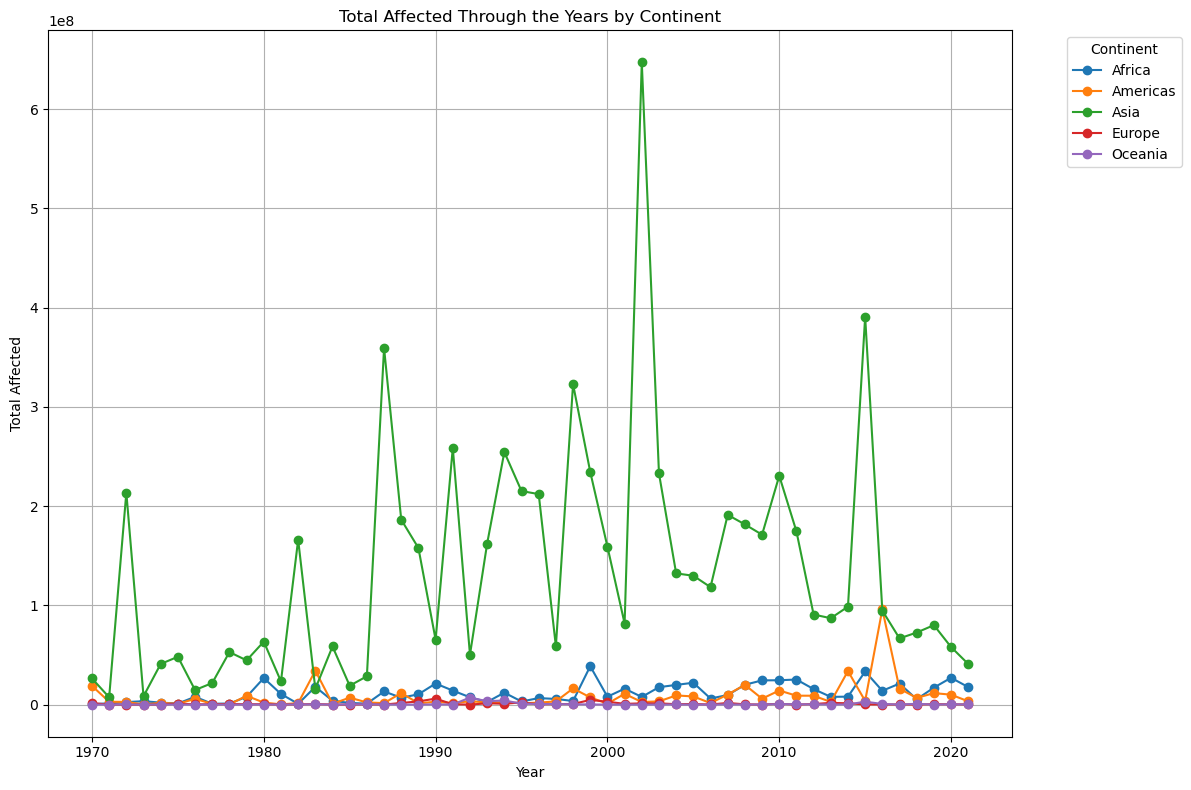

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Year and Continent, summing the "Total Affected" values.
affected_by_year_continent = df4.groupby(['Year', 'Continent'])['Total Affected'].sum().reset_index()

# Pivot the table so that each continent becomes a column with the yearly sum of total affected.
pivot_affected = affected_by_year_continent.pivot(index='Year', columns='Continent', values='Total Affected').fillna(0)

# Plotting the multi-line chart for Total Affected through the years by continent.
plt.figure(figsize=(12, 8))
for continent in pivot_affected.columns:
    plt.plot(pivot_affected.index, pivot_affected[continent], marker='o', label=continent)

plt.title("Total Affected Through the Years by Continent")
plt.xlabel("Year")
plt.ylabel("Total Affected")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


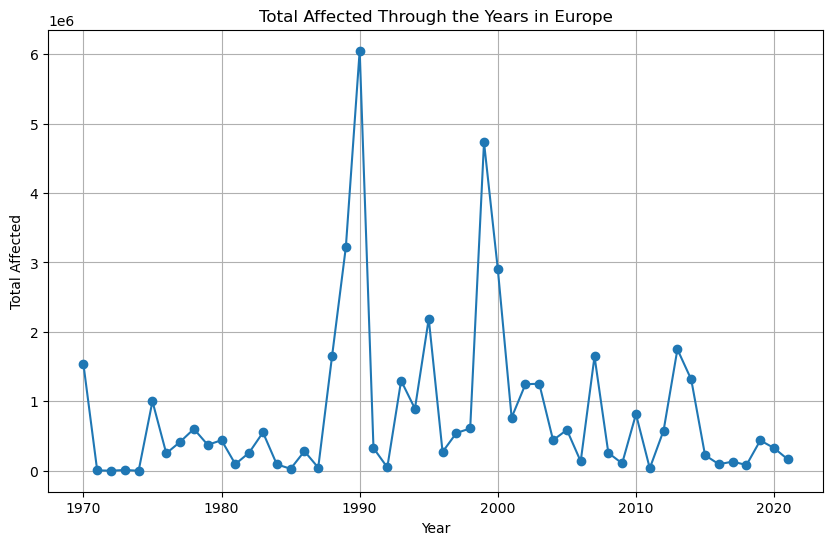

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for Europe
df_europe = df4[df4['Continent'].str.lower() == 'europe']

# Group by Year and sum up the "Total Affected" values for Europe
europe_affected = df_europe.groupby('Year')['Total Affected'].sum().reset_index()

# Plot the trend over the years for Europe
plt.figure(figsize=(10, 6))
plt.plot(europe_affected['Year'], europe_affected['Total Affected'], marker='o')
plt.title("Total Affected Through the Years in Europe")
plt.xlabel("Year")
plt.ylabel("Total Affected")
plt.grid(True)
plt.show()


/var/folders/fj/9vvpdqtn421b6np8zh3w233h0000gn/T/ipykernel_7802/921461437.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_year = df4.groupby(['Year', 'impact_segment']).size().reset_index(name='count')


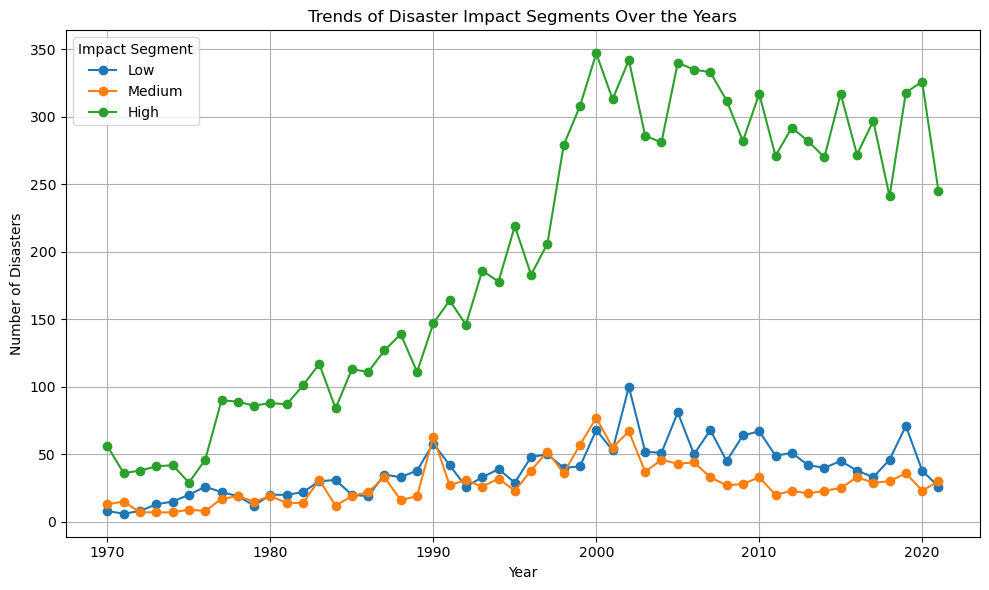

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Year and impact_segment, and count the number of disasters in each segment
segment_year = df4.groupby(['Year', 'impact_segment']).size().reset_index(name='count')

# Pivot the table so that each impact_segment becomes a column with counts per year
pivot_df = segment_year.pivot(index='Year', columns='impact_segment', values='count').fillna(0)

# Plot the trends for each impact segment as separate lines
plt.figure(figsize=(10, 6))
for segment in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[segment], marker='o', label=segment)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Trends of Disaster Impact Segments Over the Years")
plt.legend(title="Impact Segment")
plt.grid(True)
plt.tight_layout()
plt.show()


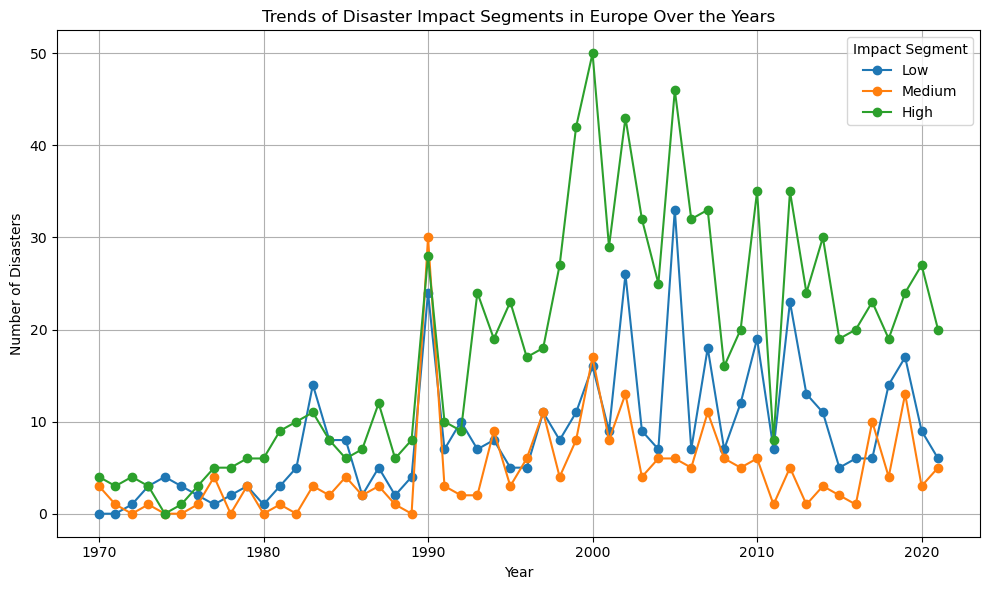

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for Europe
df_europe = df4[df4['Continent'].str.lower() == 'europe']

# Group the data by Year and impact_segment with observed set explicitly
segment_year_europe = df_europe.groupby(['Year', 'impact_segment'], observed=False).size().reset_index(name='count')

# Pivot the table so that each impact segment becomes its own column with counts per year
pivot_df_europe = segment_year_europe.pivot(index='Year', columns='impact_segment', values='count').fillna(0)

# Plot the trends for each impact segment as separate lines
plt.figure(figsize=(10, 6))
for segment in pivot_df_europe.columns:
    plt.plot(pivot_df_europe.index, pivot_df_europe[segment], marker='o', label=segment)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Trends of Disaster Impact Segments in Europe Over the Years")
plt.legend(title="Impact Segment")
plt.grid(True)
plt.tight_layout()
plt.show()


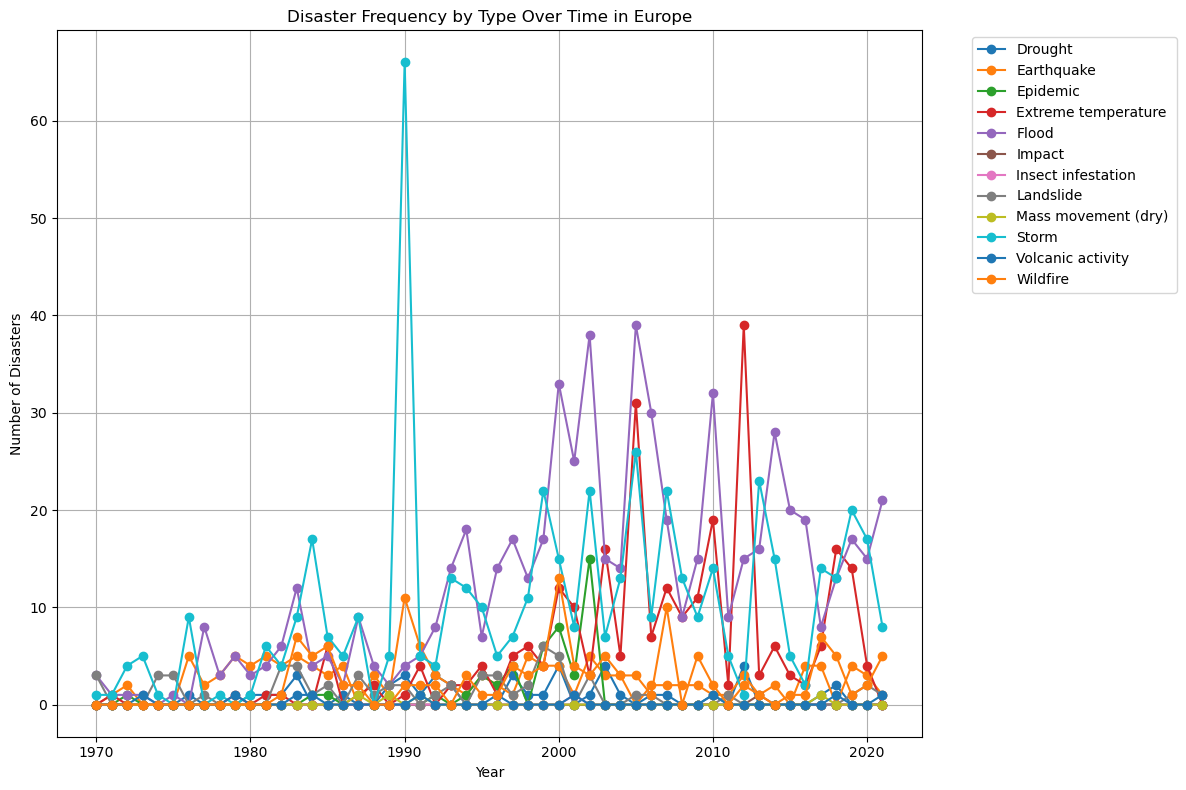

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for Europe
df_europe = df4[df4['Continent'].str.lower() == 'europe']

# Group by Year and Disaster Type, counting the number of disasters for each combination
type_year = df_europe.groupby(['Year', 'Disaster Type'], observed=False).size().reset_index(name='count')

# Pivot the table so that each disaster type becomes its own column with counts per year
pivot_type_year = type_year.pivot(index='Year', columns='Disaster Type', values='count').fillna(0)

# Plot the trends
plt.figure(figsize=(12,8))
for disaster in pivot_type_year.columns:
    plt.plot(pivot_type_year.index, pivot_type_year[disaster], marker='o', label=disaster)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Disaster Frequency by Type Over Time in Europe")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
import folium
import pandas as pd

# Aggregate the data by country using the ISO code
# (Assumes the ISO column in df4 is compatible with the geojson file's country identifiers)
disaster_by_country = df4.groupby('ISO').size().reset_index(name='disaster_count')

# URL to a GeoJSON file containing world country boundaries
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Create a base map centered globally
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Create a choropleth map using the aggregated disaster data
folium.Choropleth(
    geo_data=world_geo,
    data=disaster_by_country,
    columns=['ISO', 'disaster_count'],
    key_on='feature.id',  # This should match the country identifier in your geojson file
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Disasters'
).add_to(world_map)

# Optionally add a tooltip to display country name and count when hovering
folium.features.GeoJson(
    world_geo,
    name='Countries',
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['Country:'])
).add_to(world_map)

# Save the map to an HTML file and display it
world_map.save("world_disasters_choropleth.html")
world_map


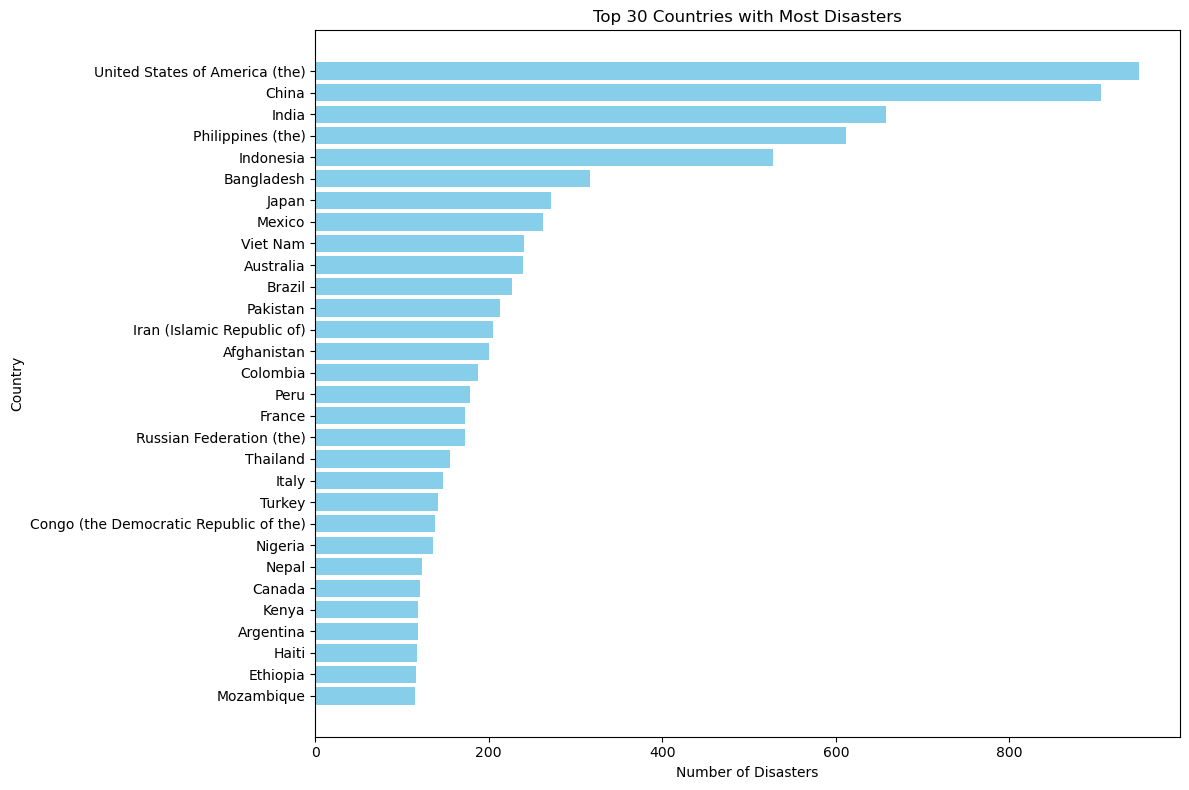

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Country' and count the number of disasters
disaster_counts = df4['Country'].value_counts().reset_index()
disaster_counts.columns = ['Country', 'Disaster_Count']

# Select the top 30 countries with the most disasters
top_30 = disaster_counts.head(30)

# Plot a horizontal bar chart for easier readability
plt.figure(figsize=(12, 8))
plt.barh(top_30['Country'][::-1], top_30['Disaster_Count'][::-1], color='skyblue')
plt.xlabel("Number of Disasters")
plt.ylabel("Country")
plt.title("Top 30 Countries with Most Disasters")
plt.tight_layout()
plt.show()


                                         Country  severity_score
40                                         China    3.256275e+09
89                                         India    2.358805e+09
15                                    Bangladesh    4.286161e+08
155                            Philippines (the)    2.362776e+08
213               United States of America (the)    1.168514e+08
26                                        Brazil    1.113654e+08
198                                     Thailand    1.102984e+08
148                                     Pakistan    9.852482e+07
218                                     Viet Nam    9.671729e+07
63                                      Ethiopia    8.462636e+07
101                                        Kenya    6.946321e+07
91                    Iran (Islamic Republic of)    5.701522e+07
103  Korea (the Democratic People's Republic of)    5.098695e+07
133                                   Mozambique    4.009687e+07
189                      

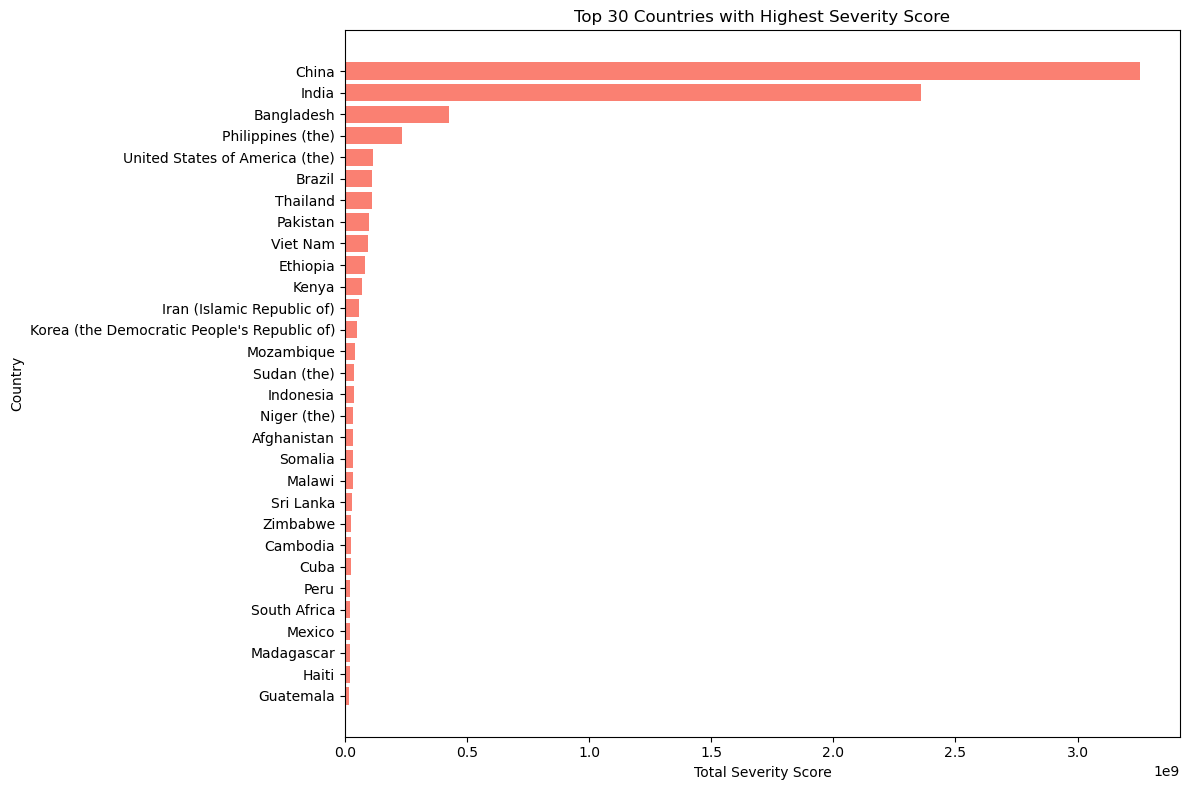

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate severity score by country
severity_by_country = df4.groupby('Country')['severity_score'].sum().reset_index()

# Sort countries by severity score in descending order and select top 30
top_30_severity = severity_by_country.sort_values('severity_score', ascending=False).head(30)

# Plot a horizontal bar chart for the top 30 countries
plt.figure(figsize=(12, 8))
plt.barh(top_30_severity['Country'][::-1], top_30_severity['severity_score'][::-1], color='salmon')
plt.xlabel("Total Severity Score")
plt.ylabel("Country")
plt.title("Top 30 Countries with Highest Severity Score")
plt.tight_layout()
plt.show()


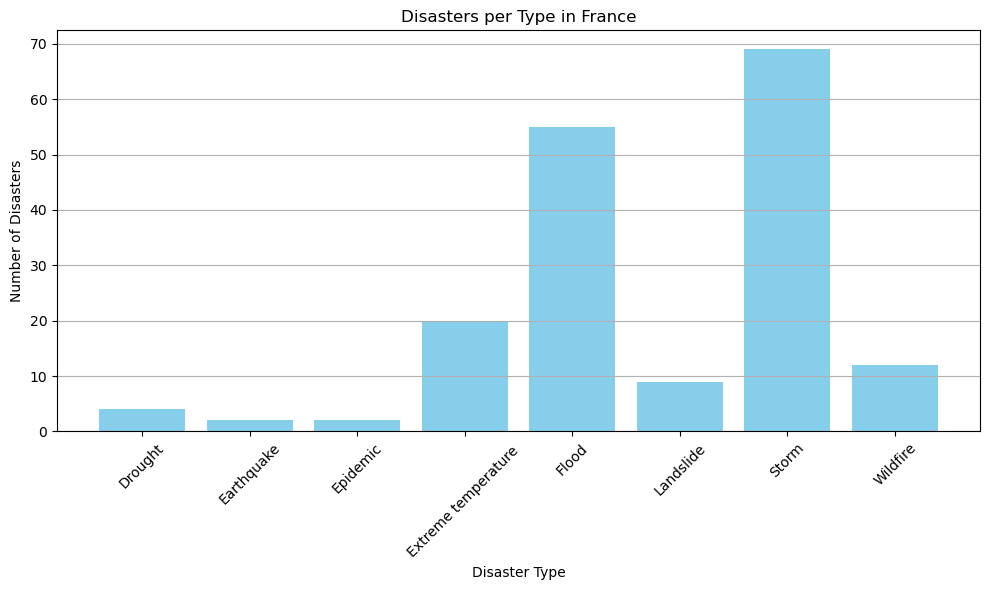

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for France
df_france = df4[df4['Country'].str.lower() == 'france']

# Group the data by Disaster Type and count the number of disasters
disasters_per_type = df_france.groupby("Disaster Type", observed=False).size().reset_index(name='count')

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(disasters_per_type["Disaster Type"], disasters_per_type["count"], color='skyblue')
plt.xlabel("Disaster Type")
plt.ylabel("Number of Disasters")
plt.title("Disasters per Type in France")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
